# Лабораторная работа №6.
# ЧИСЛЕННОЕ  ДИФФЕРЕНЦИРОВАНИЕ и РЕШЕНИЕ ЗАДАЧИ КОШИ
# Вариант 27

Работа студента группы А-13а-19
Башлыкова Матвея

**Задача 6.1. Исследовать поведение погрешностей при численном дифференцировании функции.**

1. Взять функцию из задачи 5.2.  Выбрать фиксированную точку c на отрезке [a,b] и вычислить значения производных, указанных в индивидуальном варианте в точке с.

Имеем функцию:
$$2.8 sin(3^x)$$
на отрезке \\([0, 3]\\)

Выберем точку \\(c = 1.5\\)

Имеем:
$$f'(x) = 2.8ln(3) * 3^x * cos(3^x)$$
$$f''(x) = 2.8ln^2(3) * 3^x * (cos(3^x) - 3^x * sin(3^x))$$

Зададим функции для вычисления значения функции и её производных в точке:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Функция 2.8 sin(3^x) на [0, 3]
def f(x):
    return 2.8 * math.sin(3**x)

# Производная функции
def df(x):
    return 2.8 * math.cos(3**x) * 3**x * math.log(3)

# Вторая производная функции
def d2f(x):
    return 2.8 * math.log(3) * math.log(3) * 3**x * (math.cos(3**x) - 3**x * math.sin(3**x))

# Границы отрезка и фиксированная точка
a = 0
b = 3
c = 1.5

Значения первой и второй производной в точке \\(c = 1.5\\):

In [276]:
print('f`(x) =', df(c))
print('f``(x) =', d2f(c))

f`(x) = 7.434364088422917
f``(x) = 88.94249215843462


2. Задать массив шагов h_k, k=1,…15, и вычислить массивы приближенныx значений производных  в точке по формуле (1) и по формуле из индивидуального варианта (3). Вычислить также массивы погрешностей:

\\((1)\\) $$f'(x) = \frac{f(x + h) - f(x)}{h}$$
\\((3)\\) $$f'(x) = \frac{f(x + h) - f(x - h)}{2h}$$

Зададим функции для вычисления производной для точки c и шага h:

In [277]:
# 2.8 sin(3^x) на [0, 3]
# f' центральная разностная производная (3)
# f'' односторонняя левая производная второго порядка (8)
# Вывод формулы 8a

# Правая производная первого порядка точности
def d_standard(c, h):
    return (f(c + h) - f(c)) / h

# Центральная разностная производная
def d1_variant(c, h):
    return (f(c + h) - f(c - h)) / (2 * h)

Найдём теперь массивы шагов, массивы приближённых значений производных  и массивы погрешностей:
Выведем информацию в формате

Шаг|Производная|Производная (вариант)|Погрешность|Погрешность(вариант)

In [278]:
# Число точек
number = 16

# Массив шагов
array_h = np.array([10**(-i) for i in range(1, number + 1)])

# Массивы приближённых значений производных в точке c по формулам
array_d_standard = np.array([d_standard(c, array_h[i])
                             for i in range(number)])
array_d_variant = np.array([d1_variant(c, array_h[i])
                            for i in range(number)])

# Массивы значений погрешностей
array_error_d_standard = np.array([abs(df(c) - d_standard(c, array_h[i]))
                                   for i in range(number)])
array_error_d_variant = np.array([abs(df(c) - d1_variant(c, array_h[i]))
                                  for i in range(number)])

for i in range(15):
    print('{0:1e}|{1:.8e}|{2:.8e}|{3:.8e}|{4:.8e}'.format(array_h[i],
                                                          array_d_standard[i],
                                                          array_d_variant[i],
                                                          array_error_d_standard[i],
                                                          array_error_d_variant[i]))

1.000000e-01|1.17669084e+01|7.46732431e+00|4.33254430e+00|3.29602172e-02
1.000000e-02|7.87947571e+00|7.43491063e+00|4.45111626e-01|5.46539035e-04
1.000000e-03|7.47884067e+00|7.43436958e+00|4.44765861e-02|5.48742717e-06
1.000000e-04|7.43881127e+00|7.43436414e+00|4.44717934e-03|5.48765371e-08
1.000000e-05|7.43480880e+00|7.43436409e+00|4.44713076e-04|6.08834760e-10
1.000000e-06|7.43440856e+00|7.43436409e+00|4.44710140e-05|5.23591837e-10
1.000000e-07|7.43436854e+00|7.43436409e+00|4.45013847e-06|2.58503263e-09
1.000000e-08|7.43436450e+00|7.43436404e+00|4.13367552e-07|5.29261186e-08
1.000000e-09|7.43436468e+00|7.43436446e+00|5.91003235e-07|3.68958630e-07
1.000000e-10|7.43436424e+00|7.43436868e+00|1.46914026e-07|4.58780612e-06
1.000000e-11|7.43431983e+00|7.43436424e+00|4.42620070e-05|1.46914027e-07
1.000000e-12|7.43538564e+00|7.43538564e+00|1.02155210e-03|1.02155210e-03
1.000000e-13|7.42517159e+00|7.42517159e+00|9.19249973e-03|9.19249973e-03
1.000000e-14|7.41628980e+00|7.41628980e+00|1.807428

Таким образом, для стандартного метода оптимальным является шаг \\(h = 1e-10\\), а для индивидуального варианта \\(h = 1e-6\\)

Проделаем аналогичную работу для второй производной по формуле индивидуального варианта:
$$ f''(x) = \frac{2f(x) - 5f(x-h) + 4f(x-2h) - f(x-3h)}{h^2}$$

In [279]:
# Односторонняя левая производная второго порядка
def d2_variant(c, h):
    return (2*f(c) - 5*f(c - h) + 4*f(c-2*h) - f(c - 3*h)) / h**2

# Аналогично для второй производной
array_d2_variant = np.array([d2_variant(c, array_h[i])
                             for i in range(number)])
array_error_d2_variant = np.array([abs(d2f(c) - d2_variant(c, array_h[i]))
                                   for i in range(number)])

for i in range(15):
    print('{0:1e}|{1:.8e}|{2:.8e}'.format(array_h[i],
                                          array_d2_variant[i], array_error_d2_variant[i]))

1.000000e-01|9.91495999e+01|1.02071078e+01
1.000000e-02|8.92401543e+01|2.97662094e-01
1.000000e-03|8.89457076e+01|3.21546964e-03
1.000000e-04|8.89425248e+01|3.26089979e-05
1.000000e-05|8.89425467e+01|5.45025959e-05
1.000000e-06|8.89377461e+01|4.74610176e-03
1.000000e-07|8.93063401e+01|3.63847942e-01
1.000000e-08|3.10862447e+01|5.78562475e+01
1.000000e-09|1.77635684e+03|1.68741435e+03
1.000000e-10|3.10862447e+05|3.10773504e+05
1.000000e-11|4.88498131e+07|4.88497241e+07
1.000000e-12|7.10542736e+09|7.10542727e+09
1.000000e-13|-5.32907052e+11|5.32907052e+11
1.000000e-14|-3.10862447e+13|3.10862447e+13
1.000000e-15|2.66453526e+15|2.66453526e+15


Следовательно для формулы односторонней левой производной второго порядка имеем оптимальный шаг \\(h = 1e-4\\)

Построим графики погрешностей. По оси Ox будем откладывать шаг (точка x означает шаг 1e(-x):

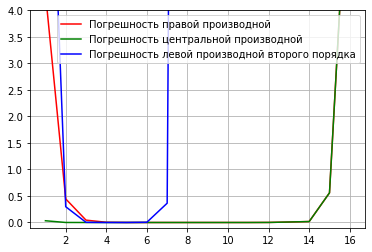

In [280]:
plt.ylim(-0.1, 4)
plt.plot(np.arange(1, number + 1), array_error_d_standard, color = 'red',
         label = 'Погрешность правой производной')
plt.plot(np.arange(1, number + 1), array_error_d_variant, color = 'green',
         label = 'Погрешность центральной производной')
plt.plot(np.arange(1, number + 1), array_error_d2_variant, color = 'blue',
         label = 'Погрешность левой производной второго порядка')
plt.grid()
plt.legend()

(0.0, 3.0)

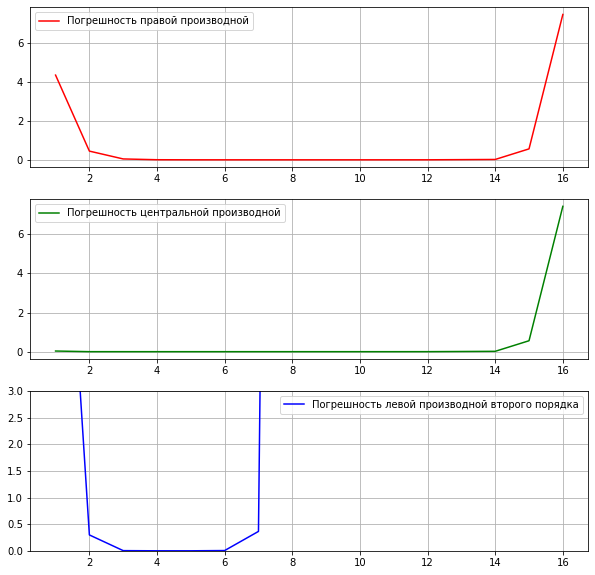

In [281]:
fig, axs = plt.subplots(3, 1, figsize = (10, 10))
axs[0].plot(np.arange(1, number + 1), array_error_d_standard, color = 'red',
            label = 'Погрешность правой производной')
axs[1].plot(np.arange(1, number + 1), array_error_d_variant, color = 'green',
            label = 'Погрешность центральной производной')
axs[2].plot(np.arange(1, number + 1), array_error_d2_variant, color = 'blue',
            label = 'Погрешность левой производной второго порядка')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.ylim(0, 3)

Функция:

$$f(x) = 2.8 sin(3^x)$$
$$f'(x) = 2.8ln(3) * 3^x * cos(3^x)$$
$$f''(x) = 2.8ln^2(3) * 3^x * (cos(3^x) - 3^x * sin(3^x))$$

Значения производных:
$$f'(x) = 7.434364088422917$$
$$f''(x) = 88.94249215843462$$

\\((1)\\) $$f'(x) = \frac{f(x + h) - f(x)}{h}$$
\\((3)\\) $$f'(x) = \frac{f(x + h) - f(x - h)}{2h}$$
\\((8)\\) $$ f''(x) = \frac{2f(x) - 5f(x-h) + 4f(x-2h) - f(x-3h)}{h^2}$$

f'(c) | Первый результат при шаге h = e-1| Наилучший результат при шаге h = e-10 | Последний результат при шаге h=e-15
------|:--------:|:--------:|------:
Формула (1)     |d1_1 = 1.17669084e+01; error1_1 = 4.33254430e+00|d1_10 = 7.43436424e+00; error1_10 = 1.46914026e-07|d1_15 = 7.99360578e+00; error1_15 = 5.59241689e-01

f'(c) | Первый результат при шаге h = e-1| Наилучший результат при шаге h = e-6 | Последний результат при шаге h=e-15
------|:--------:|:--------:|------:
Формула (3)     |d1_1 = 7.46732431e+00; error1_1 = 3.29602172e-02|d1_6 = 7.43436409e+00; error1_6 = 5.23591837e-10|d1_15 = 7.99360578e+00; error1_15 = 5.59241689e-01

f''(c) | Первый результат при шаге h = e-1| Наилучший результат при шаге h = e-4 | Последний результат при шаге h=e-15
------|:--------:|:--------:|------:
Формула (8)     |d1_1 = 9.91495999e+01; error1_1 = 1.02071078e+01|d1_4 = 8.89425248e+01; error1_4 = 3.26089979e-05|d1_15 = 2.66453526e+15; error1_15 = 2.66453526e+15

# Вывод
Формула (3) даёт лучшие результаты, чем (1) для шагов до \\(e-12\\), однако после они имеют одинаковые результаты.

Формула (8) для вычисления второй производной уже не даёт таких хороших результатов: её наименьшая погрешность достигается для шага \\(e-4\\), а затем полученные значения начинают быстро терять свою точность.

**Задача 6.2. Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка с точностью eps = 1e-6**

1. Найти аналитическое решение задачи 24 из РЗ.

$$y' = \frac{-3t + 1}{t} * y + 6t$$
$$y(1) = 3$$

Решим:
$$y' = \frac{-3t + 1}{t} * y$$
$$\frac{dy}{y} = \frac{-3t + 1}{t} * dt$$
$$ln|y| = -3t + ln|t| + ln|C|$$
$$y = \frac{tC}{e^(3t)}$$
$$y' = \frac{C}{e^(3t)} + \frac{tC'}{e^(3t)} - \frac{3tC}{e^(3t)} = \frac{-3t + 1}{t} * \frac{tC}{e^(3t)} + 6t$$
$$C' = 6e^(3t)$$
$$C = 2e^(3t) + C1$$
$$y = \frac{t(2e^(3t) + C1}{e^(3t)}$$
$$y(1) = \frac{(2e^3 + C1}{e^3} = 3$$
$$C1 = e^3$$
$$y = 2t + te^(3-3t)$$

2. Составить программу вычисления решения методом Эйлера с заданной точностью, используя правило Рунге. Найти решение задачи с точностью eps = 1e-6, число точек N и шаг, при котором точность достигается. Построить график решения.

Напишем необходимые функции:

In [4]:
# Аналитически найденная функция
def fun(x):
    return 2 * x + x * np.exp(3 - 3*x)

# Метод Эйлера для нахождения приближённого решения для конкретного разбиения
def euler(x_0, y_0, h, number_of_points, fun):
    res = [y_0]
    points = [x_0]
    for i in range(number_of_points):
        points.append(points[i] + h)
        res.append(res[i] + h * fun(points[i], res[i]))
    return np.array(res), np.array(points)

# Правило Рунге
def runge_rule(y_h, y_2h, p):
    max_error = 0
    for i in range(len(y_2h)):
        if (max_error < abs((y_h[2*i] - y_2h[i]) / (2**p - 1))):
            max_error = abs((y_h[2*i] - y_2h[i]) / (2**p - 1))
    return max_error

# Функция нахождения решения, для которого правило Рунге
# даёт максимальную погрешность меньше требуемой
def find_by_euler(x_0, y_0, begin_h, begin_n, fun, eps):
    current_h = begin_h / 2
    current_n = begin_n * 2
    y_temp2, x_temp2 = euler(x_0, y_0, current_h * 2, current_n // 2, fun)
    y_temp, x_temp = euler(x_0, y_0, current_h, current_n, fun)
    while(runge_rule(y_temp, y_temp2, 1) > eps):
        y_temp2 = y_temp
        current_h = current_h / 2
        current_n = current_n * 2
        y_temp, x_temp = euler(x_0, y_0, current_h, current_n, fun)
    return x_temp, y_temp, y_temp2, current_h, current_n

# Правая часть ОДУ
def d_fun(x, y):
    return (-3*x + 1) * y / x + 6 * x

Найдём массивы данных (шаг и число точек разбиения, приближённые значения для точек нашего разбиения, при котором достигается точность):

In [5]:
x_0 = 1
y_0 = 3
x_point = 1.8
n = 2
h = (x_point - x_0) / n

eps = 1.e-6
x_euler, y_euler, y_euler2, h_euler, n_euler = find_by_euler(x_0, y_0, h, n, d_fun, eps)
print('Шаг:', h_euler)
print('Число точек:', n_euler)

Шаг: 1.52587890625e-06
Число точек: 524288


Построим графики (на одном изображении, на раздельных и графики погрешности)

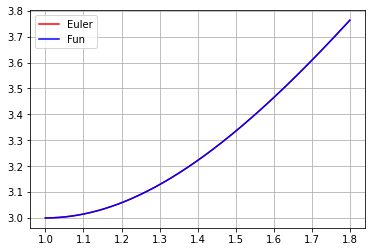

In [6]:
plt.plot(x_euler, y_euler, color = 'red', label = 'Euler')
plt.plot(x_euler, fun(x_euler), color = 'blue', label = 'Fun')
plt.grid()
plt.legend()

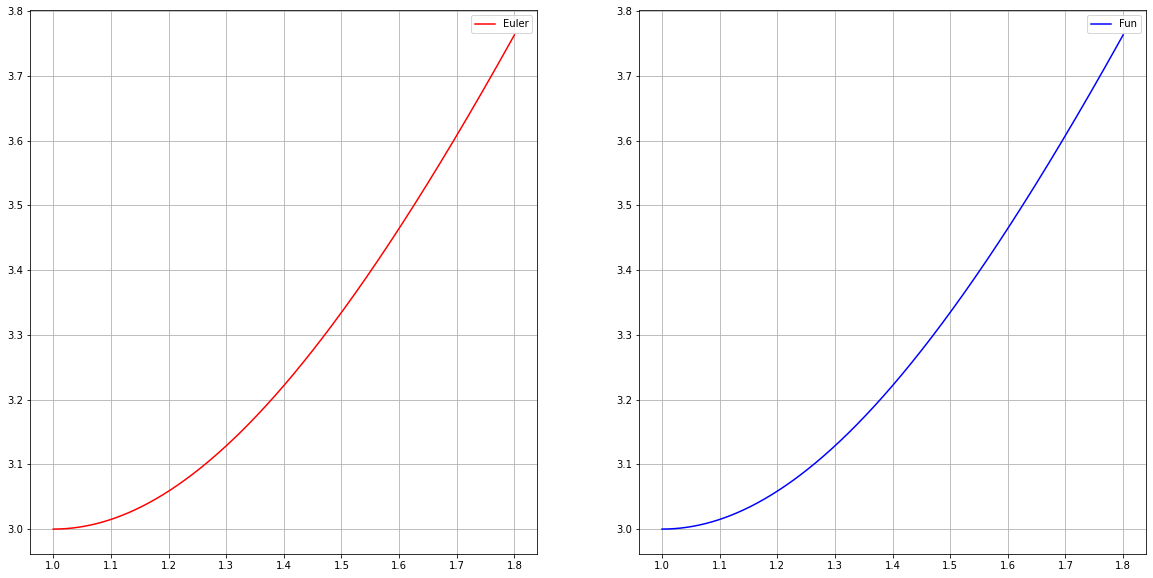

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
axs[0].plot(x_euler, y_euler, color = 'red', label = 'Euler')
axs[1].plot(x_euler, fun(x_euler), color = 'blue', label = 'Fun')
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

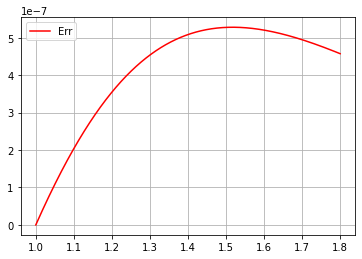

In [8]:
aaa = np.array([abs(fun(x_0 + h_euler * i) - y_euler[i]) for i in range(n_euler + 1)])
plt.plot(x_euler, aaa, color = 'red', label = 'Err')
plt.grid()
plt.legend()

3. Составить программу вычисления решения с заданной точностью методом индивидуального варианта. Найти решение задачи с заданной точностью, число точек N и шаг, при котором точность достигается. Построить график решения задачи.

Для индивидуального варианта реализуем метод Эйлера-Коши и повторим прошлый пункт для новых данных:

In [287]:
def cauchy_euler(x_0, y_0, h, number_of_points, fun):
    res = [y_0]
    points = [x_0]
    for i in range(number_of_points):
        points.append(points[i] + h)
        res.append(res[i] + h / 2 * (fun(points[i],
                                         res[i]) + fun(points[i + 1],
                                                       res[i] + h * fun(points[i], res[i]))))
    return np.array(res), np.array(points)

def find_by_cauchy_euler(x_0, y_0, begin_h, begin_n, fun, eps):
    current_h = begin_h / 2
    current_n = begin_n * 2
    y_temp2, x_temp2 = cauchy_euler(x_0, y_0, current_h * 2, current_n // 2, fun)
    y_temp, x_temp = cauchy_euler(x_0, y_0, current_h, current_n, fun)
    while(runge_rule(y_temp, y_temp2, 1) > eps):
        y_temp2 = y_temp
        current_h = current_h / 2
        current_n = current_n * 2
        y_temp, x_temp = cauchy_euler(x_0, y_0, current_h, current_n, fun)
    return x_temp, y_temp, y_temp2, current_h, current_n

x_0 = 1
y_0 = 3
x_point = 1.8
n = 2
h = (x_point - x_0) / n

eps = 1.e-6

x_cauchy_euler, y_cauchy_euler, y_cauchy_euler2, h_cauchy_euler, n_cauchy_euler = find_by_cauchy_euler(x_0,
                                                                                                       y_0,
                                                                                                       h,
                                                                                                       n,
                                                                                                       d_fun,
                                                                                                       eps)
print('Шаг:', h_cauchy_euler)
print('Число точек:', n_cauchy_euler)

Шаг: 0.00078125
Число точек: 1024


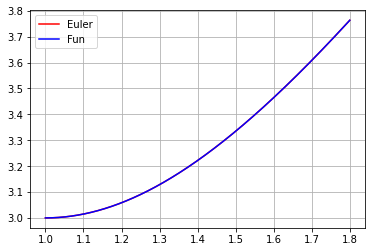

In [288]:
plt.plot(x_cauchy_euler, y_cauchy_euler, color = 'red', label = 'Euler')
plt.plot(x_cauchy_euler, fun(x_cauchy_euler), color = 'blue', label = 'Fun')
plt.grid()
plt.legend()

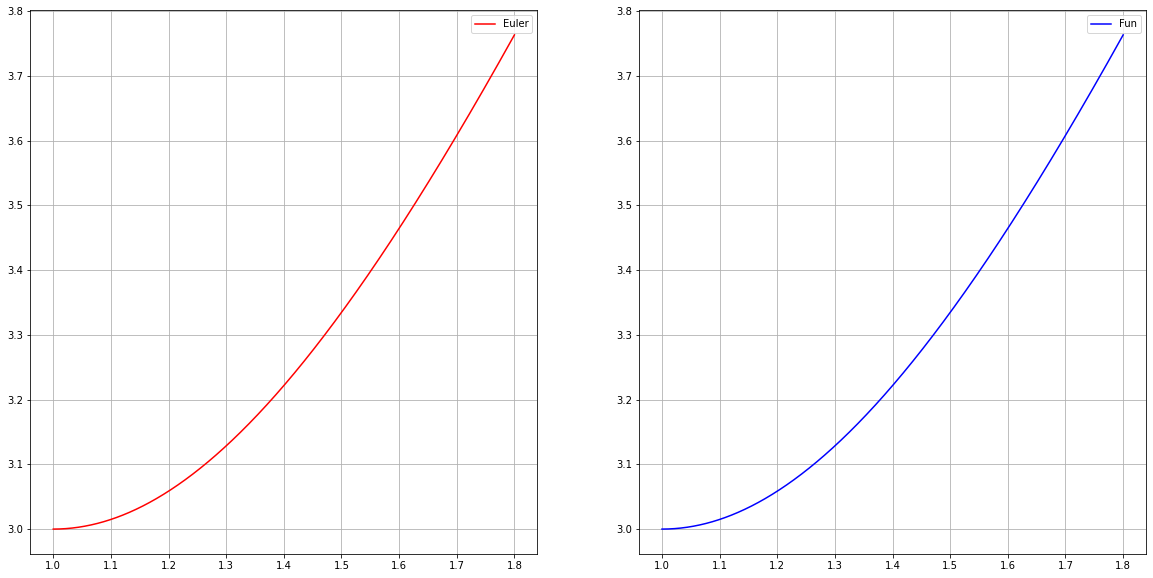

In [289]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
axs[0].plot(x_cauchy_euler, y_cauchy_euler, color = 'red', label = 'Euler')
axs[1].plot(x_cauchy_euler, fun(x_cauchy_euler), color = 'blue', label = 'Fun')
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

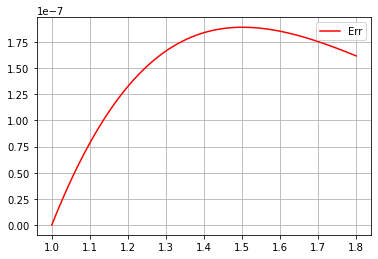

In [290]:
aaa = np.array([abs(fun(x_0 + h_cauchy_euler * i) - y_cauchy_euler[i])
                for i in range(n_cauchy_euler + 1)])
plt.plot(x_cauchy_euler, aaa, color = 'red', label = 'Err')
plt.grid()
plt.legend()

# Вывод:
Метод Эйлера-Коши даёт лучшие результаты в сравнении с методом Эйлера: мы получили более точный результат, при этом нам потребовалось в 512 раз меньшее число точек. 